In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data downloaded from https://ourworldindata.org/coronavirus-source-data

In [2]:
dCV = pd.read_csv('full_data.csv').fillna(0)
dCV.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0


In [3]:
dCV.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus',
       'Belgium', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       "Cote d'Ivoire", 'Democratic Republic of Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Ethiopia',
       'Faeroe Islands', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Guadeloupe', 'Guernsey', 'Guinea',
       'Guyana', 'Vatican', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'International', 'Iran', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan

In [4]:
def groupby_column(df, column):
    gb_obj = df.groupby(column)
    gb_datadict = {key: gb_obj.get_group(key) for key in gb_obj.groups}
    return gb_datadict

def add_days(df_dict):
    days = []
    for key in df_dict.keys():
        df_dict[key].loc[:,'day'] = [ i for i in range(1, df_dict[key].shape[0]+1)]   
        df_dict[key].loc[:,'reverse_day'] = list(-1 *np.array(sorted([ i for i in range(1, df_dict[key].shape[0]+1)], 
                                                                     reverse = True)))
    return df_dict

def add_log(df_dict, column):
    days = []
    for key in df_dict.keys():
        df_dict[key].loc[:,'log_'+ str(column)] = np.log(abs(df_dict[key][column]))
    return df_dict

In [32]:
dCV_loc_dict = groupby_column(dCV, 'location')
print(dCV_loc_dict['Italy'].shape[0])
dCV_country = add_days(dCV_loc_dict)  
dCV_country['India'].head()

44


,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day
867,2020-01-30,India,0.0,0.0,1,0.0,1,-45
868,2020-01-31,India,0.0,0.0,1,0.0,2,-44
869,2020-02-01,India,0.0,0.0,1,0.0,3,-43
870,2020-02-02,India,1.0,0.0,2,0.0,4,-42
871,2020-02-03,India,1.0,0.0,3,0.0,5,-41


In [37]:
dCV_country = add_log(dCV_country, 'total_cases')
dCV_country = add_log(dCV_country, 'day')
dCV_country['Italy'].head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day,log_total_cases,log_day
1042,2020-01-31,Italy,0.0,0.0,2,0.0,1,-44,0.693147,0.000000
1043,2020-02-01,Italy,0.0,0.0,2,0.0,2,-43,0.693147,0.693147
1044,2020-02-02,Italy,0.0,0.0,2,0.0,3,-42,0.693147,1.098612
1045,2020-02-03,Italy,0.0,0.0,2,0.0,4,-41,0.693147,1.386294
1046,2020-02-04,Italy,0.0,0.0,2,0.0,5,-40,0.693147,1.609438


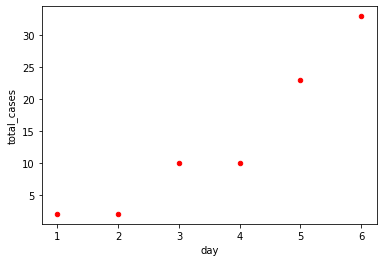

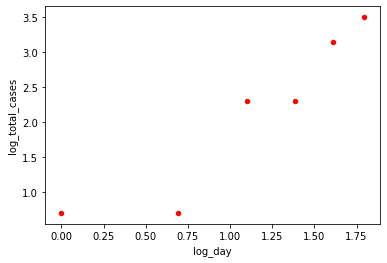

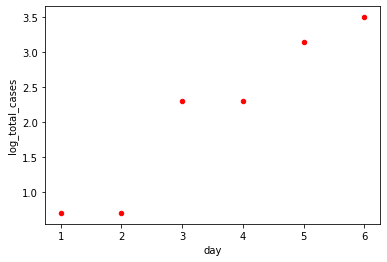

In [87]:
dCV_country['Albania'].plot(kind='scatter',x='day',y='total_cases',color='red')
plt.show()
dCV_country['Albania'].plot(kind='scatter',x='log_day',y='log_total_cases',color='red')
plt.show()
dCV_country['Albania'].plot(kind='scatter',x='day',y='log_total_cases',color='red')
plt.show()

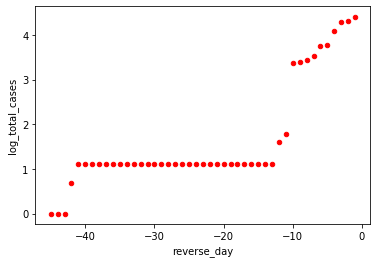

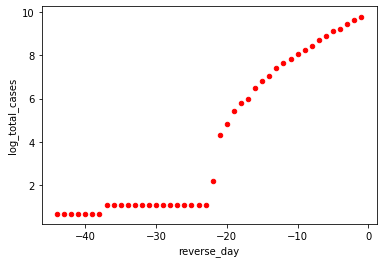

In [10]:
dCV_country['India'].plot(kind='scatter',x='reverse_day',y='log_total_cases',color='red')
dCV_country['Italy'].plot(kind='scatter',x='reverse_day',y='log_total_cases',color='red')

In [55]:
def get_data_from_ndays(df_dict, ndays = 30):
    df_subdict = {}
    for key in df_dict.keys():
        df_subdict[key] = df_dict[key].loc[df_dict[key]['day']>=ndays]
    return df_subdict
dCVsub_country = get_data_from_ndays(dCV_country)
dCVsub_country['Italy']

def get_data_from_bigchange(df_dict, threshold = 1.5):
    df_subdict = {}
    for key in df_dict.keys():
        #print(key)
        next_day = (df_dict[key]['total_cases'])
        previous_day = (df_dict[key]['total_cases']).shift(1, axis=0)
        growth = (next_day-previous_day)/previous_day
        growth = growth.fillna(0)
        growth = growth.replace({np.inf:0,-np.inf:0})
        #print(growth)
        try:
            idx = growth.loc[growth>=threshold].index[0]
            df_subdict[key] = df_dict[key].loc[idx:,:]
        except:
            df_subdict[key] = df_dict[key]
    return df_subdict
dCVch_country = get_data_from_bigchange(dCV_country)
dCVch_country['Italy']

,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day,log_total_cases,log_day
1064,2020-02-22,Italy,6.0,0.0,9,0.0,23,-22,2.197225,3.135494
1065,2020-02-23,Italy,67.0,0.0,76,2.0,24,-21,4.330733,3.178054
1066,2020-02-24,Italy,48.0,0.0,124,2.0,25,-20,4.820282,3.218876
1067,2020-02-25,Italy,105.0,4.0,229,6.0,26,-19,5.433722,3.258097
1068,2020-02-26,Italy,93.0,5.0,322,11.0,27,-18,5.774552,3.295837
1069,2020-02-27,Italy,78.0,1.0,400,12.0,28,-17,5.991465,3.332205
1070,2020-02-28,Italy,250.0,5.0,650,17.0,29,-16,6.476972,3.367296
1071,2020-02-29,Italy,238.0,4.0,888,21.0,30,-15,6.788972,3.401197
1072,2020-03-01,Italy,240.0,8.0,1128,29.0,31,-14,7.028201,3.433987
1073,2020-03-02,Italy,561.0,6.0,1689,35.0,32,-13,7.431892,3.465736


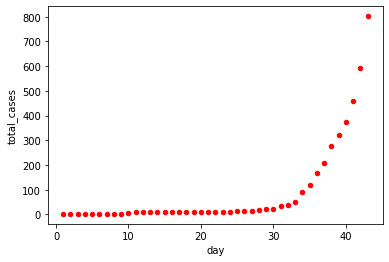

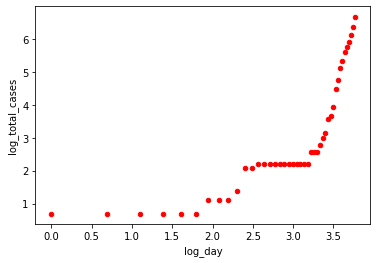

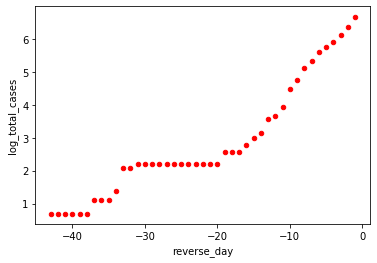

In [12]:
dCV_country['United Kingdom'].plot(kind='scatter',x='day',y='total_cases',color='red')
plt.show()
dCV_country['United Kingdom'].plot(kind='scatter',x='log_day',y='log_total_cases',color='red')
plt.show()
dCV_country['United Kingdom'].plot(kind='scatter',x='reverse_day',y='log_total_cases',color='red')
plt.show()

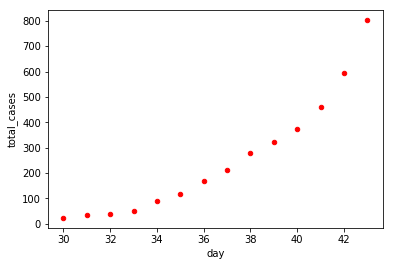

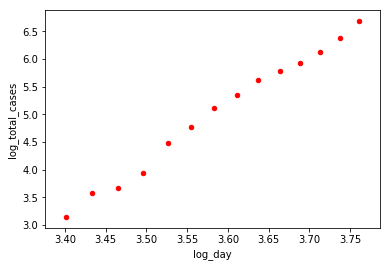

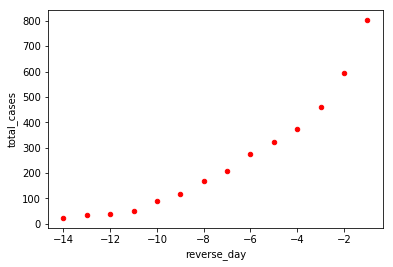

In [13]:
dCVsub_country['United Kingdom'].plot(kind='scatter',x='day',y='total_cases',color='red')
plt.show()
dCVsub_country['United Kingdom'].plot(kind='scatter',x='log_day',y='log_total_cases',color='red')
plt.show()
dCVsub_country['United Kingdom'].plot(kind='scatter',x='reverse_day',y='total_cases',color='red')
plt.show()

In [81]:
from sklearn.linear_model import LinearRegression
def linear_model(df, country='India'):
    if np.max(df[country]['total_cases']) <=20:
        print(f'Not enough data for {country}')
        return None
    model = LinearRegression()
    x = np.array(df[country]['day']).reshape(-1,1)
    y = np.array(df[country]['log_total_cases']).reshape(-1,1)
    model.fit(x, y)
    x_new = np.linspace(30,48,19)
    print(x_new)
    y_new = model.predict(x_new.reshape(-1,1))
    next_three = list(np.exp(y_new.reshape(-1,1))[-3:])
    print(f'The estimated number of cases in next 3 days are {next_three}')
    # plot the results
    plt.plot(x, y, 'x', label = 'actual')
    intercept = float(model.intercept_[0])
    slope = float(model.coef_[0])
    plt.plot(x_new, y_new, 'b', label = 'y = {:.2f} + {:.2f}*x'.format(intercept, slope)) 
    plt.xlabel('days')
    plt.ylabel('log_total_cases')
    plt.legend(loc="upper left")
    plt.show()
    return model

[30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48.]
The estimated number of cases in next 3 days are [array([167.69589876]), array([218.17694387]), array([283.85416213])]


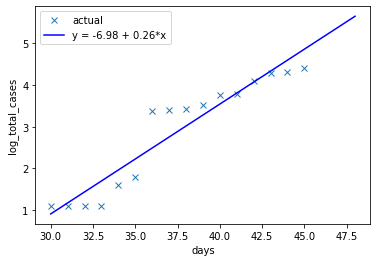

In [78]:
model = linear_model(dCVsub_country, 'India')

In [79]:
model = linear_model(dCVch_country, 'Afghanistan')

not enough data for Afghanistan


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/fpil/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


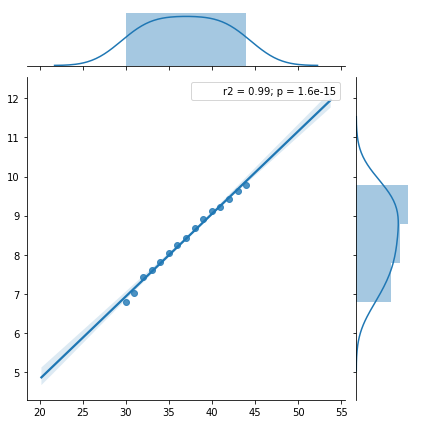

In [16]:
import seaborn as sns
from scipy import stats
country = 'Italy'
x = np.array(dCVsub_country[country]['day']).reshape(-1,1)
y = np.array(dCVsub_country[country]['log_total_cases']).reshape(-1,1)
def r2(x, y):
    r = stats.pearsonr(x, y)[0] ** 2
    p = stats.pearsonr(x, y)[1]
    return (r,p) 
sns.jointplot(x, y, kind="reg", stat_func=r2)

In [17]:
from scipy import optimize

def piecewise_linear(x, x0, x1,x2, b1, b2, k0,k1, k2):
    condlist = [x < x0, (x >= x0) & (x < x1), (x >= x1) & (x < x2), (x >= x2)]
    funclist = [lambda x: b1, 
#                 lambda x: b1 + k0*(x-x0),
                lambda x: b1+ k0*(x-x0)+ k1*(x-x1),
#                 lambda x: b1 + b2 + k1*(x-x1),
                lambda x: b2,
#                 lambda x: b1 + b2 + k1*(x-x1) + k2*(x-x2)
                lambda x: b2+k2*(x-x2)
               ]
    return np.piecewise(x, condlist, funclist)



s = 'India'
x  = np.array(dCV_country[s]['log_day'])
y  = np.array(dCV_country[s]['log_total_cases'])
p, e = optimize.curve_fit(piecewise_linear, x, y)

/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([1.00000000e+00, 1.00000000e+00, 3.44291939e+00, 1.48702108e-15,
        1.04674755e+00, 1.00000000e+00, 1.00000000e+00, 1.03551556e+01]),
 array([[inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf]]))

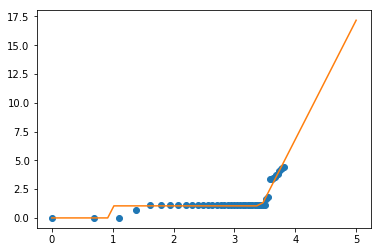

In [18]:
xd = np.linspace(0,5, 50)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))

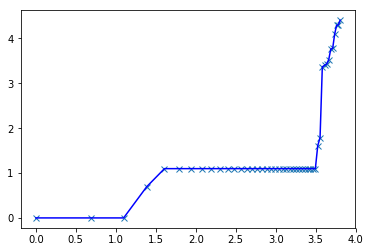

In [19]:
from scipy import interpolate
tck = interpolate.splrep(x, y, s=0)
ynew = interpolate.splev(x, tck, der=0)

plt.plot(x, y, 'x', x, ynew, 'b')

In [20]:
F = interpolate.PPoly.from_spline(tck)
F.x, F.c

(array([0.        , 0.        , 0.        , 0.        , 1.09861229,
        1.38629436, 1.60943791, 1.79175947, 1.94591015, 2.07944154,
        2.19722458, 2.30258509, 2.39789527, 2.48490665, 2.56494936,
        2.63905733, 2.7080502 , 2.77258872, 2.83321334, 2.89037176,
        2.94443898, 2.99573227, 3.04452244, 3.09104245, 3.13549422,
        3.17805383, 3.21887582, 3.25809654, 3.29583687, 3.33220451,
        3.36729583, 3.40119738, 3.4339872 , 3.4657359 , 3.49650756,
        3.52636052, 3.55534806, 3.58351894, 3.61091791, 3.63758616,
        3.66356165, 3.68887945, 3.71357207, 3.73766962, 3.76120012,
        3.80666249, 3.80666249, 3.80666249, 3.80666249]),
 array([[ 3.51439570e+00,  3.51439570e+00,  3.51439570e+00,
          3.51439570e+00, -8.17690173e+00, -7.31740211e+00,
          1.57299203e+01, -5.38198756e+00,  1.77902394e+00,
         -5.73015240e-01,  1.80875147e-01, -5.61772549e-02,
          1.72178511e-02, -5.21898771e-03,  1.56714363e-03,
         -4.66676910e-04,  1.3

### 

In [96]:
dCVsub_country['Australia']

,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day,log_total_cases,log_day
109,2020-02-23,Australia,1.0,0.0,22,0.0,30,-21,3.091042,3.401197
110,2020-02-24,Australia,0.0,0.0,22,0.0,31,-20,3.091042,3.433987
111,2020-02-25,Australia,0.0,0.0,22,0.0,32,-19,3.091042,3.465736
112,2020-02-26,Australia,1.0,0.0,23,0.0,33,-18,3.135494,3.496508
113,2020-02-27,Australia,0.0,0.0,23,0.0,34,-17,3.135494,3.526361
114,2020-02-28,Australia,0.0,0.0,23,0.0,35,-16,3.135494,3.555348
115,2020-02-29,Australia,1.0,0.0,24,0.0,36,-15,3.178054,3.583519
116,2020-03-01,Australia,1.0,0.0,25,0.0,37,-14,3.218876,3.610918
117,2020-03-02,Australia,2.0,0.0,27,1.0,38,-13,3.295837,3.637586
118,2020-03-03,Australia,6.0,0.0,33,1.0,39,-12,3.496508,3.663562


In [98]:

def get_intercept_grad(country):

    #x = np.array(dCVsub_country[country]['reverse_day']).reshape(-1,1)[:,0]
    #y = np.array(dCVsub_country[country]['log_total_cases']).reshape(-1,1)[:,0]
    if np.max(dCVsub_country[country]['total_cases']) <=20 :
        print(f'Not enough data for {country}')
        return None
    x = np.array(dCVsub_country[country]['day']).reshape(-1,1)[:,0]
    y = np.array(dCVsub_country[country]['log_total_cases']).reshape(-1,1)[:,0]

    from scipy.stats import linregress
    gradient, intercept, r_val, p_val,std_error = linregress(x,y)
    y_pred = intercept + gradient*x
    
    test_days = np.max(dCVch_country[country]['day'])

    x_in = np.linspace(1,test_days+1,test_days+1)[-1]
   
    #x_in = np.linspace(30,45,16)[-1]
    y_out = intercept + gradient*x_in

    yhat_out = y_out
    # estimate stdev of yhat
    sum_errs = np.sum((np.exp(y) - np.exp(y_pred))**2)
    stdev = np.sqrt(1/(len(y)-2) * sum_errs)
    
    # calculate prediction interval
    interval = 1.96 * stdev
    print('Prediction Interval: %.3f' % interval)
    lower, upper = np.exp(yhat_out) - interval, np.exp(yhat_out) + interval
    print('95%% likelihood that the tomorrow value is between %.3f and %.3f' % (lower, upper))
    #print('True value: %.3f' % np.exp(y_out))
    # plot dataset and prediction with interval
    #plt.scatter(x, np.exp(y))
    #plt.plot(x, np.exp(y_pred), color='red')
    #plt.errorbar(x_in, np.exp(yhat_out), yerr=interval, color='black', fmt='o')
    #plt.show()
    
    return intercept, gradient

reg_df = pd.DataFrame(columns=['intercept', 'grad', 'maxCases'])

for country, data in dCVsub_country.items():
    #print(country, len(data))
    if len(data)>0:
        print(country)
        try:
            intercept, gradient = get_intercept_grad(country)
            reg_df.loc[country] = [intercept, gradient,max(data['total_cases'])]
        except:
            print('No Model')

Australia
Prediction Interval: 26.305
95% likelihood that the tomorrow value is between 135.835 and 188.445
Belgium
Prediction Interval: 134.128
95% likelihood that the tomorrow value is between 717.499 and 985.754
Cambodia
Not enough data for Cambodia
No Model
Canada
Prediction Interval: 15.669
95% likelihood that the tomorrow value is between 161.562 and 192.901
China
Prediction Interval: 1679.198
95% likelihood that the tomorrow value is between 81008.226 and 84366.622
Finland
Prediction Interval: 19.440
95% likelihood that the tomorrow value is between 119.243 and 158.123
France
Prediction Interval: 545.861
95% likelihood that the tomorrow value is between 5887.733 and 6979.455
Germany
Prediction Interval: 649.738
95% likelihood that the tomorrow value is between 4787.684 and 6087.160
India
Prediction Interval: 31.399
95% likelihood that the tomorrow value is between 136.297 and 199.095
International
Prediction Interval: 0.584
95% likelihood that the tomorrow value is between 695.8

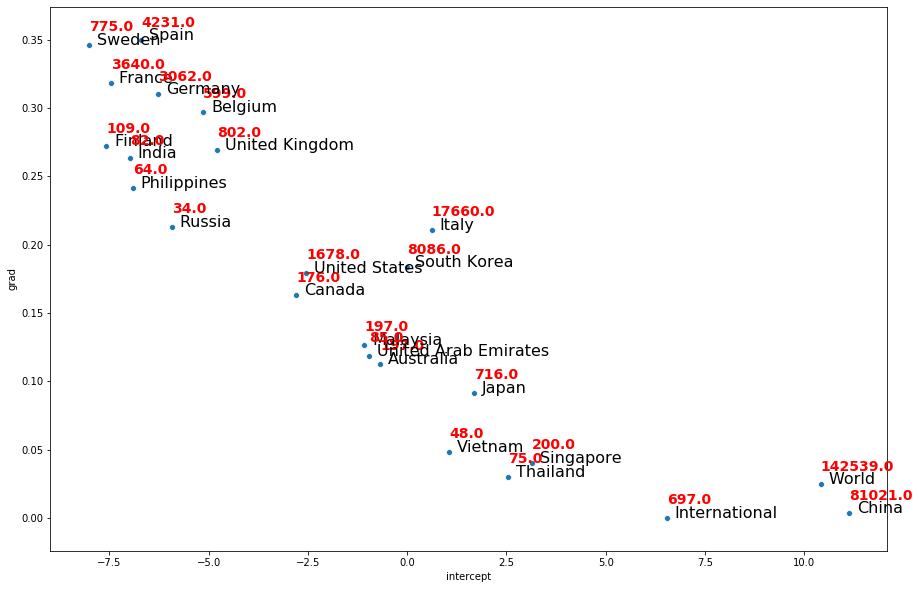

In [101]:
import seaborn as sns

plt.figure(figsize=[15,10])

p1 = sns.scatterplot(data=reg_df,x= 'intercept', y= 'grad')


for i in range(0,reg_df.shape[0]):
    p1.text(reg_df.intercept[i]+0.2, reg_df.grad[i], reg_df.index[i], horizontalalignment='left', 
            size='medium',color='black',  fontsize =16)
    p1.text(reg_df.intercept[i], reg_df.grad[i]+0.01, reg_df.maxCases[i], 
            horizontalalignment='left', size='medium', color='red', weight='semibold', fontsize = 14)
p1.figure.savefig('Images/Gradient_Intercept.png')

In [24]:
def get_piecewise(s):

    x  = np.array(dCV_country[s]['log_day'])
    y  = np.array(dCV_country[s]['log_total_cases'])
    p, e = optimize.curve_fit(piecewise_linear, x, y)
    
    xd = np.linspace(0,4)
    #plt.plot(x, y, "o")
    #plt.plot(xd, piecewise_linear(xd, *p))
    #plt.show()
    return p

reg_df = pd.DataFrame(columns=['p0', 'p1', 'p2', 'p3', 'p4', 'p5','p6','p7',  'maxCases'])

for country, data in dCVsub_country.items():
    #print(country, len(data))
    if len(data)>10:
        print(country)
        p= get_piecewise(country)
        reg_df.loc[country] = p.tolist()+  [max(data['total_cases'])]

reg_df

Australia
Cambodia
Canada
China
Finland
France
Germany
India
Italy
Japan
Malaysia
Nepal
Philippines
Russia
Singapore
South Korea
Spain
Sri Lanka
Sweden
Thailand
United Arab Emirates
United Kingdom
United States
Vietnam
World


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance o

,p0,p1,p2,p3,p4,p5,p6,p7,maxCases
Australia,1.0,1.0,1.935688,1.242453e+00,1.721888e+00,1.0,1.0,1.165708e+00,197.0
Cambodia,1.0,1.0,3.925813,7.368763e-17,1.740448e-01,1.0,1.0,1.222725e+00,7.0
Canada,1.0,1.0,3.352985,3.465736e-01,1.771513e+00,1.0,1.0,5.975998e+00,176.0
China,1.0,1.0,-11.756470,5.682097e+00,-1.521971e+01,1.0,1.0,1.719335e+00,81021.0
Finland,1.0,1.0,3.341578,3.568375e-17,3.003358e-07,1.0,1.0,9.627936e+00,109.0
France,1.0,1.0,3.443438,1.098612e+00,2.085111e+00,1.0,1.0,1.331242e+01,3640.0
Germany,1.0,1.0,3.378555,6.931472e-01,2.545030e+00,1.0,1.0,1.183987e+01,3062.0
India,1.0,1.0,3.442919,1.487021e-15,1.046748e+00,1.0,1.0,1.035516e+01,82.0
Italy,1.0,1.0,2.937891,6.931472e-01,9.719044e-01,1.0,1.0,1.119479e+01,17660.0
Japan,1.0,1.0,1.632474,4.204157e-18,3.662041e-01,1.0,1.0,2.414661e+00,716.0


In [25]:
'''       
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import seaborn as sns
from adjustText import adjust_text

#plotvar = region2spiceingre_df_combined.T


n_components=3
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(reg_df[['p0', 'p1', 'p2', 'p3', 'p4', 'p5','p6','p7']])

xs = principalComponents[:,1]
ys = principalComponents[:,2]
plt.figure(figsize=(20, 10))

plt.scatter(xs ,ys )
textall=[]

for i in range(0,reg_df.shape[0]):

    textall.append(plt.text(xs[i], ys[i], reg_df.index[i], color = 'g', ha = 'center', va = 'center', fontsize=12))
adjust_text(textall)


plt.show()

'''

"       \nfrom scipy.spatial.distance import cdist\nfrom sklearn.decomposition import PCA\nimport seaborn as sns\nfrom adjustText import adjust_text\n\n#plotvar = region2spiceingre_df_combined.T\n\n\nn_components=3\npca = PCA(n_components=n_components)\nprincipalComponents = pca.fit_transform(reg_df[['p0', 'p1', 'p2', 'p3', 'p4', 'p5','p6','p7']])\n\nxs = principalComponents[:,1]\nys = principalComponents[:,2]\nplt.figure(figsize=(20, 10))\n\nplt.scatter(xs ,ys )\ntextall=[]\n\nfor i in range(0,reg_df.shape[0]):\n\n    textall.append(plt.text(xs[i], ys[i], reg_df.index[i], color = 'g', ha = 'center', va = 'center', fontsize=12))\nadjust_text(textall)\n\n\nplt.show()\n\n"

In [26]:


def spline_inter(country):

    x = np.array(dCVsub_country[country]['reverse_day']).reshape(-1,1)[:,0]
    y = np.array(dCVsub_country[country]['log_total_cases']).reshape(-1,1)[:,0]
    
    tck = interpolate.splrep(x, y, k=2, s=0)
    print(len(tck[1]), len(x))
    
    
    xnew = np.linspace(-20, 3)
    fig, axes = plt.subplots(3)

    axes[0].plot(x, y, 'x', label = 'data')
    axes[0].plot(xnew, interpolate.splev(xnew, tck, der=0), label = 'Fit')
    axes[1].plot(x, interpolate.splev(x, tck, der=1), label = '1st dev')
    dev_2 = interpolate.splev(x, tck, der=2)
    axes[2].plot(x, dev_2, label = '2st dev')

    turning_point_mask = dev_2 == np.amax(dev_2)
    axes[2].plot(x[turning_point_mask], dev_2[turning_point_mask],'rx',
                 label = 'Turning point')
    for ax in axes:
        ax.legend(loc = 'best')

    plt.show()



In [27]:
'''
reg_df = pd.DataFrame(columns=['intercept', 'grad', 'maxCases'])

for country, data in dCVsub_country.items():
    #print(country, len(data))
    if len(data)>0:
        print(country)
        spline_inter(country)
        #reg_df.loc[country] = [intercept, gradient,max(data['total_cases'])]

'''

"\nreg_df = pd.DataFrame(columns=['intercept', 'grad', 'maxCases'])\n\nfor country, data in dCVsub_country.items():\n    #print(country, len(data))\n    if len(data)>0:\n        print(country)\n        spline_inter(country)\n        #reg_df.loc[country] = [intercept, gradient,max(data['total_cases'])]\n\n"

In [28]:
dCV_complete = pd.DataFrame()

for country, data in dCV_country.items():
    #print(data)
    if len(data.loc[data['total_cases']>0])> 0: 
    
        dCV_complete =dCV_complete.append(data)
dCV_complete.head()  

,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day,log_total_cases,log_day
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0,1,-19,0.0,0.000000
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0,2,-18,0.0,0.693147
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0,3,-17,0.0,1.098612
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0,4,-16,0.0,1.386294
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0,5,-15,0.0,1.609438


In [29]:
# delete countries where no of cases are less than 73


country = ['India', 'Italy','France','Germany','Spain', 'South Korea', 'Finland', 'Belgium',  'United Kingdom', 'United States']
temp = dCV_complete.loc[(dCV_complete['total_cases']>=18) & (dCV_complete['location'].isin(country)) ] # 
temp


,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day,log_total_cases,log_day
232,2020-03-05,Belgium,15.0,0.0,23,0.0,30,-10,3.135494,3.401197
233,2020-03-06,Belgium,27.0,0.0,50,0.0,31,-9,3.912023,3.433987
234,2020-03-07,Belgium,59.0,0.0,109,0.0,32,-8,4.691348,3.465736
235,2020-03-08,Belgium,60.0,0.0,169,0.0,33,-7,5.129899,3.496508
236,2020-03-09,Belgium,31.0,0.0,200,0.0,34,-6,5.298317,3.526361
...,...,...,...,...,...,...,...,...,...,...
2296,2020-03-10,United States,259.0,8.0,472,19.0,48,-5,6.156979,3.871201
2297,2020-03-11,United States,224.0,6.0,696,25.0,49,-4,6.545350,3.891820
2298,2020-03-12,United States,291.0,4.0,987,29.0,50,-3,6.894670,3.912023
2299,2020-03-13,United States,277.0,7.0,1264,36.0,51,-2,7.142037,3.931826


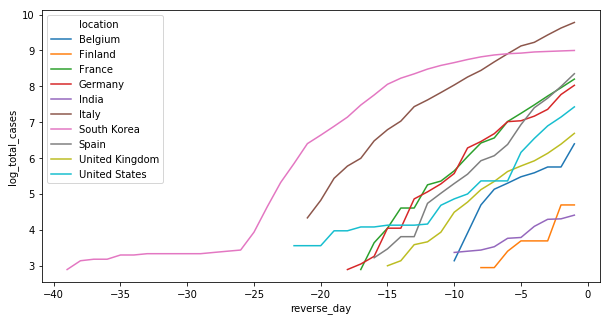

In [30]:
import seaborn as sns
plt.figure(figsize=[10,5])

sns.lineplot(data = temp, x='reverse_day',y='log_total_cases',hue='location' )
#dCV_complete.plot(kind='scatter',x='reverse_day',y='total_cases',hue='country')